# Visualize COCO Dataset

To confirm COCO dataset was made correctly

## Imports

In [49]:
import os
from PIL import Image
import numpy as np
import random

# Input and output folders
input_folder = 'cropped_all/labels_imgs'
output_folder = 'cropped_all/labels_with_txts'

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)


## Create example COCO dataset

In [50]:
# List all PNG files in the input folder
png_files = [file for file in os.listdir(input_folder) if file.endswith('.png')]

In [51]:
png_files

['drishtiGS_001.png',
 'drishtiGS_002.png',
 'drishtiGS_003.png',
 'drishtiGS_004.png',
 'drishtiGS_005.png',
 'drishtiGS_006.png',
 'drishtiGS_007.png',
 'drishtiGS_008.png',
 'drishtiGS_009.png',
 'drishtiGS_010.png',
 'drishtiGS_011.png',
 'drishtiGS_012.png',
 'drishtiGS_013.png',
 'drishtiGS_014.png',
 'drishtiGS_015.png',
 'drishtiGS_016.png',
 'drishtiGS_017.png',
 'drishtiGS_018.png',
 'drishtiGS_019.png',
 'drishtiGS_020.png',
 'drishtiGS_021.png',
 'drishtiGS_022.png',
 'drishtiGS_023.png',
 'drishtiGS_024.png',
 'drishtiGS_025.png',
 'drishtiGS_026.png',
 'drishtiGS_027.png',
 'drishtiGS_028.png',
 'drishtiGS_029.png',
 'drishtiGS_030.png',
 'drishtiGS_031.png',
 'drishtiGS_032.png',
 'drishtiGS_033.png',
 'drishtiGS_034.png',
 'drishtiGS_035.png',
 'drishtiGS_036.png',
 'drishtiGS_037.png',
 'drishtiGS_038.png',
 'drishtiGS_039.png',
 'drishtiGS_040.png',
 'drishtiGS_041.png',
 'drishtiGS_042.png',
 'drishtiGS_043.png',
 'drishtiGS_044.png',
 'drishtiGS_045.png',
 'drishtiG

In [52]:
for png_file in png_files:
    # Load the PNG image from the "labels/" folder
    img = Image.open(os.path.join(input_folder, png_file))
    
    # Convert the image to a NumPy array for easier processing
    img_array = np.array(img)
    
    # Treat the green channel as a mask and find the coordinates of non-zero pixels
    mask_coordinates = np.argwhere(img_array[:, :, 1] > 0)
    
    # Calculate the bounding box from the mask coordinates
    min_y, min_x = np.min(mask_coordinates, axis=0)
    max_y, max_x = np.max(mask_coordinates, axis=0)
    
    # Calculate the bounding box dimensions
    x_center = (min_x + max_x) / 2 / img_array.shape[1]
    y_center = (min_y + max_y) / 2 / img_array.shape[0]
    # Clip width and height to stay within the [0, 1] range
    # Calculate the maximum allowed width and height
    max_width = min((1 - x_center) * 2, x_center * 2)
    max_height = min((1 - y_center) * 2, y_center * 2)

    # Ensure that width and height do not exceed the maximum allowed values
    width = min(max((max_x - min_x + 20) / img_array.shape[1], 0), max_width)
    height = min(max((max_y - min_y + 20) / img_array.shape[0], 0), max_height)

    
    # Define the output file path and name
    txt_file = os.path.splitext(png_file)[0] + '.txt'
    txt_path = os.path.join(output_folder, txt_file)
    
    # Save the label values in the .txt file
    with open(txt_path, 'w') as txt_file:
        txt_file.write(f'0 {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}')


## View COCO dataset on image

To make sure the coordinates were correct

In [1]:
from PIL import Image, ImageDraw
import os

# Input and output folders
# output_folder = 'cropped_all_tighter/labels'
# images_folder = 'cropped_all_tighter/images'
output_folder = '/home/kindersc/Documents/glaucoma_datasets/yolo/stereoscopic/test/labels_txt'
images_folder = '/home/kindersc/Documents/glaucoma_datasets/yolo/stereoscopic/test/images'

# List all .txt files in the output folder
txt_files = [file for file in os.listdir(output_folder) if file.endswith('.txt')]
print(txt_files)
print(len(txt_files))

# Process the first three .txt files
for i, txt_file in enumerate(txt_files[270:]):
    print(txt_file)
    if i >= 1:
        break  # Only process the first 3 label files

    # Load the corresponding image from the "images/" folder
    image_filename = os.path.splitext(txt_file)[0] + '.png'
    image_path = os.path.join(images_folder, image_filename)
    image = Image.open(image_path)

    # Load the label values from the .txt file
    txt_path = os.path.join(output_folder, txt_file)
    with open(txt_path, 'r') as txt_file:
        cls_name, x_center, y_center, width, height = map(float, txt_file.read().strip().split())

    # Calculate the bounding box coordinates in pixel values
    img_width, img_height = image.size
    left = int((x_center - width / 2) * img_width)
    top = int((y_center - height / 2) * img_height)
    right = int((x_center + width / 2) * img_width)
    bottom = int((y_center + height / 2) * img_height)

    # Create a drawing object
    draw = ImageDraw.Draw(image)

    # Draw the bounding box
    draw.rectangle([left, top, right, bottom], outline="red", width=3)

    # Show the image with the bounding box
    # image.show()

print("Bounding boxes shown on the first 3 images.")


['refuge_n0048.txt', 'g1020_image_1843.txt', 'g1020_image_704.txt', 'chaksu_IMG_3253.txt', 'refuge_g0006.txt', 'origa_197.txt', 'origa_059.txt', 'messidor_image71prime.txt', 'chaksu_IMG_4404.txt', 'refuge_T0046.txt', 'refuge_T0050.txt', 'g1020_image_1366.txt', 'chaksu_IMG_3321.txt', 'messidor_image269prime.txt', 'origa_394.txt', 'chaksu_IMG_3536.txt', 'chaksu_IMG_3890.txt', 'origa_318.txt', 'g1020_image_2039.txt', 'chaksu_IMG_3398.txt', 'refuge_T0392.txt', 'messidor_image404prime.txt', 'chaksu_IMG_2613.txt', 'g1020_image_2033.txt', 'chaksu_IMG_3969.txt', 'chaksu_IMG_4488.txt', 'refuge_n0181.txt', 'refuge_V0027.txt', 'g1020_image_337.txt', 'messidor_image194prime.txt', 'refuge_V0150.txt', 'refuge_V0361.txt', 'messidor_image236prime.txt', 'g1020_image_2880.txt', 'refuge_V0142.txt', 'g1020_image_2915.txt', 'refuge_n0290.txt', 'refuge_n0101.txt', 'refuge_V0367.txt', 'refuge_V0272.txt', 'g1020_image_223.txt', 'chaksu_54.txt', 'chaksu_IMG_3222.txt', 'g1020_image_1139.txt', 'g1020_image_2407.

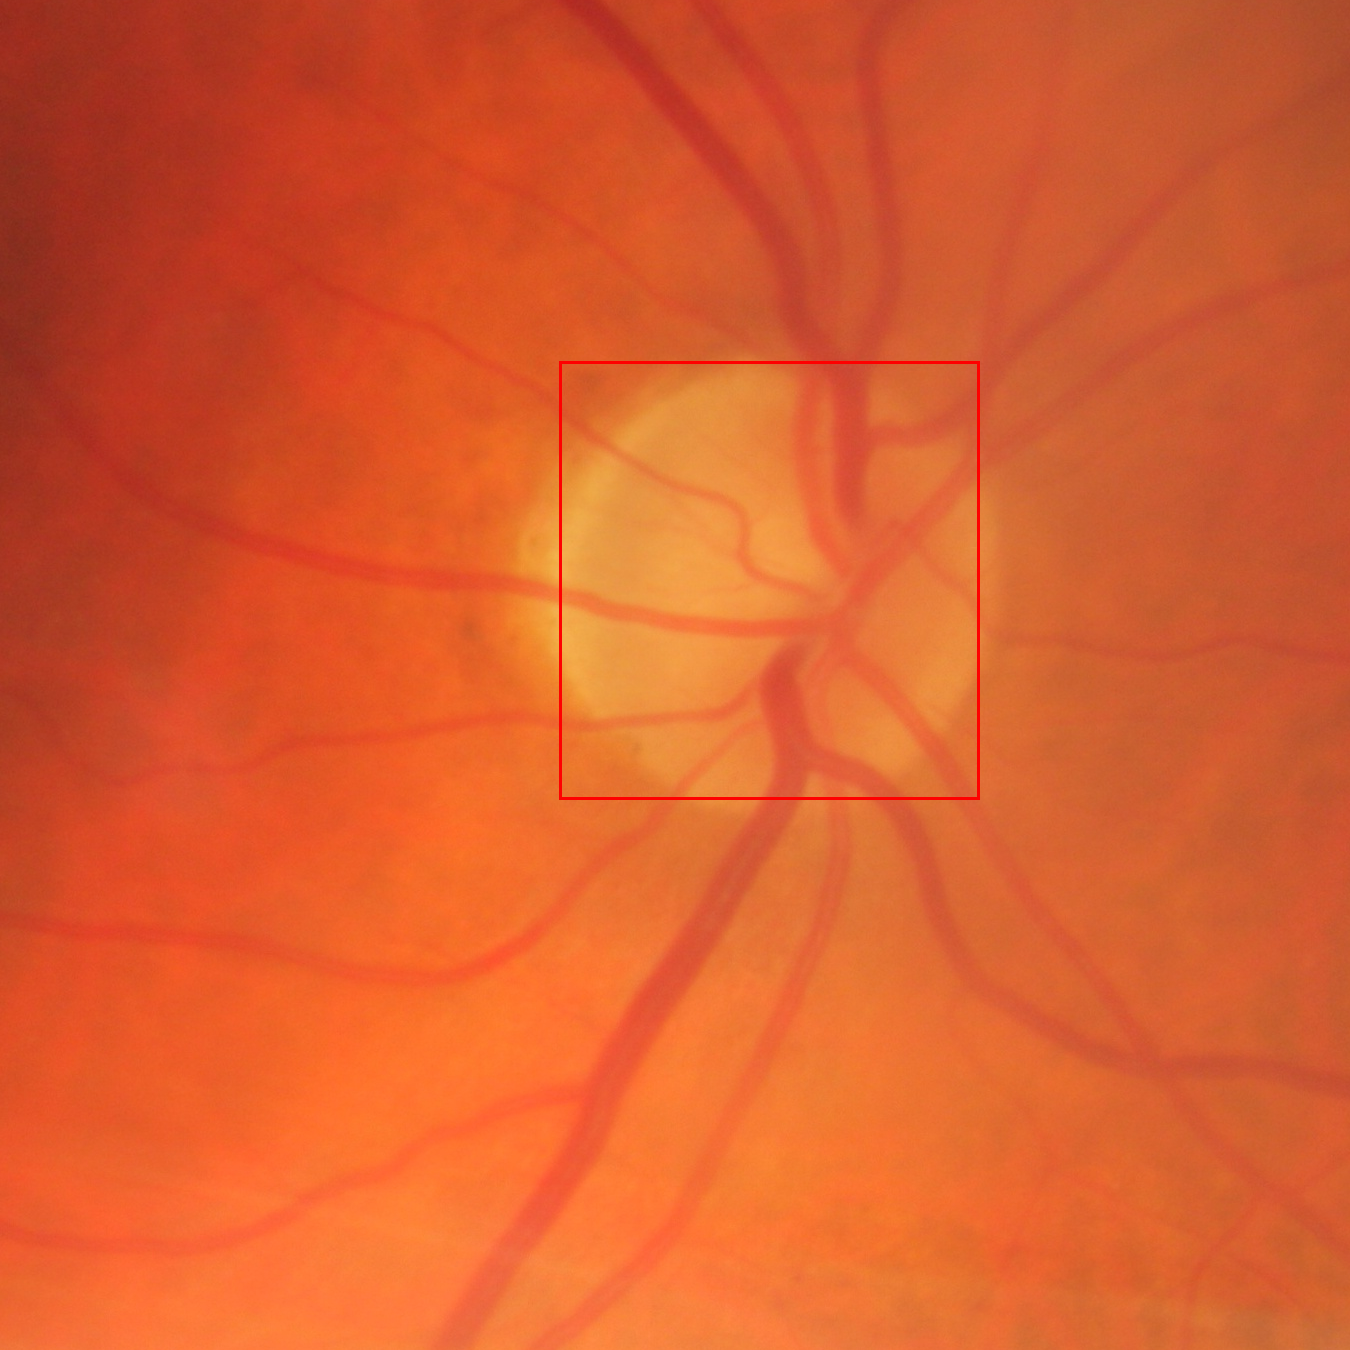

In [2]:
image